204.23280324073724 , -29.878623456789622


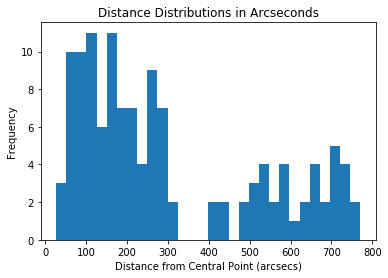

In [1]:
#Importing Modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
#the info variable now contains the position and naming information
#info.columns - assigning the information in the columns to variables
ra=info['RA']
dec=info['DEC']
names=info['object']
#print(len(ra))

#to find central point, take mean of all ra and dec values
x1 = np.mean(ra)
y1 = np.mean(dec)

print(x1, ",", y1)

'''
for i in range (1, 126):
    print(ra[i], ",", dec[i])
    #to get right ascension and declination points
'''

#calculating distances between points in arcseconds and (x1,y1), adding to listy
listy = []
for i in range (0,126):
    deltay = (dec[i]-y1)
    deltax = (ra[i]-x1)
    d = (deltay**2 + deltax**2)**0.5
    d_arcsec = d*3600
    #print(d_arcsec)
    listy.append(d_arcsec)
#print(len(listy))

#create histogram to display these distances from central point
plt.hist(listy, bins=30) #intakes list of numbers, bins = number of sections
#plt.axis([0, 800, 0, 30]) #don't bother changing axes values, program does it for you
plt.ylabel('Frequency')
plt.xlabel('Distance from Central Point (arcsecs)')
plt.title('Distance Distributions in Arcseconds')
plt.savefig("DistanceDistributionsHist.png")

In [2]:
#function converting from wavelength to velocity
def rb_veldiff(waverest,wave):
    spl=2.9979e5; #speed of light
    vel = (waverest-wave*(1.0 + 0.))*spl/(wave*(1.0 + 0.))
    return vel

In [3]:
#opening the fits files
# Open the co-added flux cube
'''
tab (probably table) is just a variable that now holds the data from the fits files, 
so you can tabulate through the data to get values at certain positions
'''
#FLUX values
tab=fits.open('coadd_spectrum.fits')
flux=tab[0].data #flux gets the flux values from the specific spectrum file
#ERROR valies
tab=fits.open('coadd_spectrum_err.fits')
error=tab[0].data #error is a variable that will be getting the error values from respective file
#WAVELENGTH values
tab=fits.open('wave_grid.fits')
wave=tab[0].data *10. #multiplying by 10 converts it to Angstroms
#wave variable is now getting the wavelength values from its respective file

#by summing up the values in each column of the matrix, we get the total flux at each point

# Read in meta information - reading the fits format
tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
#the info variable now contains the position and naming information
#info.columns - assigning the information in the columns to variables
ra=info['RA']
dec=info['DEC']
names=info['object']

# Read in the DSS image - opening the fits file to look at galaxy image
tab=fits.open('dss_m83.fits');
im=tab[0].data
header=tab[0].header

wcs_map = WCS(header) #referring to world coordinate system

# convert RA DEC to x y - this function performs the transformation from spherical to cartesian basically
wx, wy = wcs_map.wcs_world2pix(ra,dec,0)

#finding relative velocities
# Create velocity grid for MW and M83
ztarget = 0.001711;
#redshift value of M83 (for the galaxy as a whole)
wrest=(wave)/(1.+ztarget);
CaII_wrestK= 3933.6614 # 3934.7771
CaII_wrestH= 3968.4673 
#H and K are prominent absorption lines for Ca II

vel_M83K=rb_veldiff(CaII_wrestK,wrest);
vel_MWK= rb_veldiff(CaII_wrestK,wave);

"""
to find the relative velocity of M83 with the point using the K absorption line, take the difference between 
the rest wavelength of Ca II and the rest wavelength (adjusted for Doppler shift)
to find the relative velocity of the Milky Way with the point using K absorption line, take difference of 
the rest wavelength of Ca II and the observed wavelength

do basically the same thing below for the H absorption line
"""

vel_M83H=rb_veldiff(CaII_wrestH,wrest);
vel_MWH= rb_veldiff(CaII_wrestH,wave);

# extracting a spectrum

In [4]:
def extractIndex(name):
    # Read in meta information - reading the fits format
    tab=fits.open('SCIENCE_RBNSPECTRA.fits');
    info= tab[1].data
    #the info variable now contains the position and naming information
    #info.columns - assigning the information in the columns to variables
    ra=info['RA']
    dec=info['DEC']
    names=info['object']
    
    #index=(name==names)
    
    index = 0 #initialize the variable
        
    #go through the list "names" and check which one matches with the input, trying to extract index number of input
    for i in range(len(names)):
        if names[i] == name:
            index = i
        #if the indexed item matches with the input, the index becomes i
    return index

204.19312499999657 , -29.742861111110606


Text(0.5, 1.0, 'M83_Disk_075')

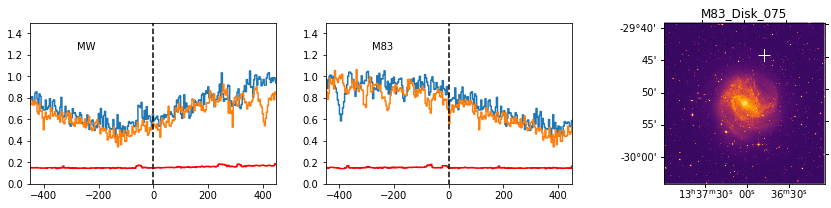

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [7]:
name = names[1] #input name of position
index = extractIndex(name)

print(ra[index], ',', dec[index])

xrange=[-450.,450.] #setting the range of the data
fig = plt.figure(figsize=(15, 35)) #creating a 1500 x 3500 pixel figure
pos = 1

#Milky Way
ax1 = fig.add_subplot(10,3,1) #number of rows, number of columns, index of column
plt.figure(figsize=(20,10))
ax1.step(vel_MWK,flux[:,index]) #plotting the relative Milky Way velocity using K
ax1.step(vel_MWK,error[:,index],'r') #plotting the error of K measurements
ax1.step(vel_MWH,flux[:,index]) #plotting relative Milky Way velocity using H
ax1.plot([0,0],[-2,2],'k--') #plots dashed line down the middle of graph at xrange 0, yrange -2 to 2
ax1.set_xlim(xrange) #regular x-range, defined above
ax1.set_ylim([0,1.5]) #y-limit is 1.5 because the flux has been normalized
ax1.text(-280,1.25,'MW') #puts a label of what is being represented
#ax1.text(-280,.25,str(index)) #writes down the object number/point number on graph

#M83
ax2 = fig.add_subplot(10,3,2)
plt.figure(figsize=(20,10))
ax2.step(vel_M83K,flux[:,index])
ax2.step(vel_M83K,error[:,index],'r')
ax2.step(vel_M83H,flux[:,index])
ax2.set_xlim(xrange)
ax2.set_ylim([0,1.5])
ax2.text(-280,1.25,'M83')
ax2.plot([0,0],[-2,2],'k--')

#image of the galaxy and places a cross at the point the spectrum is coming from
ax3 = fig.add_subplot(10,3,3,projection=wcs_map)
ax3.imshow(im,origin="lower",cmap=cm.inferno)#,vmin=-0.01, vmax=0.06)
ax3.plot(wx[index],wy[index],'+',color='white',markersize=12)
ax3.set_title(names[index])

In [9]:
def extractSpectrum(index):
    
    # Read in meta information - reading the fits format
    tab=fits.open('SCIENCE_RBNSPECTRA.fits');
    info= tab[1].data
    #the info variable now contains the position and naming information
    #info.columns - assigning the information in the columns to variables
    ra=info['RA']
    dec=info['DEC']
    names=info['object']
    
    print(ra[index], ',', dec[index])
    
    xrange=[-450.,450.] #setting the range of the data
    fig = plt.figure(figsize=(15, 35)) #creating a 1500 x 3500 pixel figure
    pos = 1
    
    #Milky Way
    ax1 = fig.add_subplot(10,3,1) #number of rows, number of columns, index of column
    plt.figure(figsize=(20,10))
    ax1.step(vel_MWK,flux[:,index]) #plotting the relative Milky Way velocity using K
    ax1.step(vel_MWK,error[:,index],'r') #plotting the error of K measurements
    ax1.step(vel_MWH,flux[:,index]) #plotting relative Milky Way velocity using H
    ax1.plot([0,0],[-2,2],'k--') #plots dashed line down the middle of graph at xrange 0, yrange -2 to 2
    ax1.set_xlim(xrange) #regular x-range, defined above
    ax1.set_ylim([0,1.5]) #y-limit is 1.5 because the flux has been normalized
    ax1.text(-280,1.25,'MW') #puts a label of what is being represented
    #ax1.text(-280,.25,str(index)) #writes down the object number/point number on graph
    
    #M83
    ax2 = fig.add_subplot(10,3,2)
    plt.figure(figsize=(20,10))
    ax2.step(vel_M83K,flux[:,index])
    ax2.step(vel_M83K,error[:,index],'r')
    ax2.step(vel_M83H,flux[:,index])
    ax2.set_xlim(xrange)
    ax2.set_ylim([0,1.5])
    ax2.text(-280,1.25,'M83')
    ax2.plot([0,0],[-2,2],'k--')
    
    #image of the galaxy and places a cross at the point the spectrum is coming from
    ax3 = fig.add_subplot(10,3,3,projection=wcs_map)
    ax3.imshow(im,origin="lower",cmap=cm.inferno)#,vmin=-0.01, vmax=0.06)
    ax3.plot(wx[index],wy[index],'+',color='white',markersize=12)
    ax3.set_title(names[index])
    
    return;

204.19312499999657 , -29.742861111110606


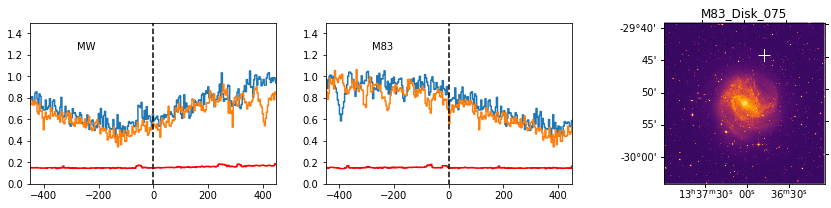

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [10]:
extractSpectrum(1)

Text(0.5, 1.0, 'M83_Disk_014')

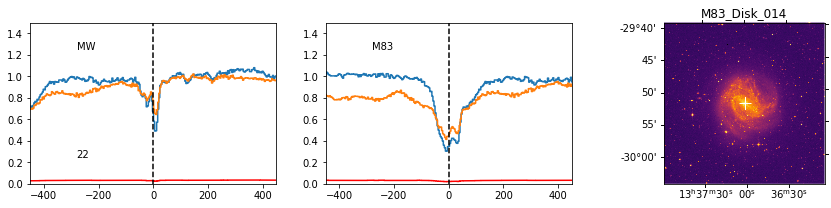

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [11]:
#try to plot an individual spectrum along with its position on the actual picture
xrange=[-450.,450.] #setting the range of the data
fig = plt.figure(figsize=(15, 35)) #creating a 1500 x 3500 pixel figure
pos = 1

'''
tried to create graphs for all spectra, too many graphs, not enough space
dont use this code

for i in range(1,126):
    index = i
    
    #Milky Way
    ax1 = fig.add_subplot(10,3,pos) #number of rows, number of columns, index of column
    #plt.figure(figsize=(20,10))
    ax1.step(vel_MWK,flux[:,index]) #plotting the relative Milky Way velocity using K
    ax1.step(vel_MWK,error[:,index],'r') #plotting the error of K measurements
    ax1.step(vel_MWH,flux[:,index]) #plotting relative Milky Way velocity using H
    ax1.plot([0,0],[-2,2],'k--') #plots dashed line down the middle of graph at xrange 0, yrange -2 to 2
    ax1.set_xlim(xrange) #regular x-range, defined above
    ax1.set_ylim([0,1.5]) #y-limit is 1.5 because the flux has been normalized
    ax1.text(-280,1.25,'MW') #puts a label of what is being represented
    ax1.text(-280,.25,str(index)) #writes down the object number/point number on graph
    
    #M83
    ax2 = fig.add_subplot(10,3,pos+1)
    #plt.figure(figsize=(20,10))
    ax2.step(vel_M83K,flux[:,index])
    ax2.step(vel_M83K,error[:,index],'r')
    ax2.step(vel_M83H,flux[:,index])
    ax2.set_xlim(xrange)
    ax2.set_ylim([0,1.5])
    ax2.text(-280,1.25,'M83')
    ax2.plot([0,0],[-2,2],'k--')
    
    #image of the galaxy and places a cross at the point the spectrum is coming from
    ax3 = fig.add_subplot(10,3,pos+2,projection=wcs_map)
    ax3.imshow(im,origin="lower",cmap=cm.inferno)#,vmin=-0.01, vmax=0.06)
    ax3.plot(wx[index],wy[index],'+',color='white',markersize=12)
    ax3.set_title(names[index])
    
    pos += 3

'''
index = 22

#Milky Way
ax1 = fig.add_subplot(10,3,1) #number of rows, number of columns, index of column
plt.figure(figsize=(20,10))
ax1.step(vel_MWK,flux[:,index]) #plotting the relative Milky Way velocity using K
ax1.step(vel_MWK,error[:,index],'r') #plotting the error of K measurements
ax1.step(vel_MWH,flux[:,index]) #plotting relative Milky Way velocity using H
ax1.plot([0,0],[-2,2],'k--') #plots dashed line down the middle of graph at xrange 0, yrange -2 to 2
ax1.set_xlim(xrange) #regular x-range, defined above
ax1.set_ylim([0,1.5]) #y-limit is 1.5 because the flux has been normalized
ax1.text(-280,1.25,'MW') #puts a label of what is being represented
ax1.text(-280,.25,str(index)) #writes down the object number/point number on graph

#M83
ax2 = fig.add_subplot(10,3,2)
plt.figure(figsize=(20,10))
ax2.step(vel_M83K,flux[:,index])
ax2.step(vel_M83K,error[:,index],'r')
ax2.step(vel_M83H,flux[:,index])
ax2.set_xlim(xrange)
ax2.set_ylim([0,1.5])
ax2.text(-280,1.25,'M83')
ax2.plot([0,0],[-2,2],'k--')

#image of the galaxy and places a cross at the point the spectrum is coming from
ax3 = fig.add_subplot(10,3,3,projection=wcs_map)
ax3.imshow(im,origin="lower",cmap=cm.inferno)#,vmin=-0.01, vmax=0.06)
ax3.plot(wx[index],wy[index],'+',color='white',markersize=12)
ax3.set_title(names[index])


# approximate RA and DEC distributions from mean

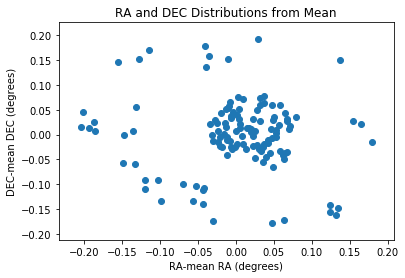

In [12]:
RAlist = []
DEClist = []

for i in range(len(ra)):
    A = ra[i]-x1
    B = dec[i]-y1
    RAlist.append(A)
    DEClist.append(B)

plt.scatter(RAlist, DEClist)
plt.title('RA and DEC Distributions from Mean')
plt.xlabel('RA-mean RA (degrees)')
plt.ylabel('DEC-mean DEC (degrees)')
plt.show()

In [13]:
780./3600.

0.21666666666666667

# comparison of exact to approximate angular separation

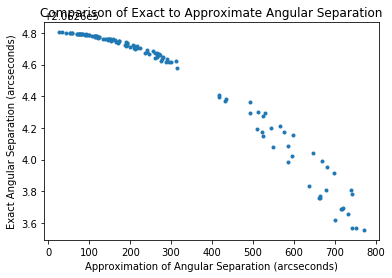

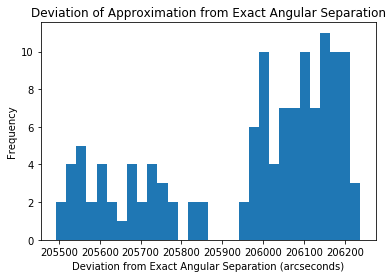

In [14]:
#calculating the exact angular separation between points on celestial sphere
#convert all arcsecond measurements to radians
raRad = ra*(np.pi/(180.))
decRad = dec*(np.pi/(180.))
x1Rad = x1*(np.pi/(180.))
y1Rad = y1*(np.pi/(180.))
#listyRad=np.array(listy)*(np.pi/(180.*3600.)) #make listy an array to be able to convert to radians

#calculating the exact angular separation using formula
angles = []
for i in range(0,126):
    #angular separation formula
    thetaRad = (np.sin(y1Rad)*np.sin(decRad[i])+np.cos(y1Rad)*np.cos(decRad[i])*np.cos(x1Rad-raRad[i]))
    angles.append(thetaRad) #angles now contains the angular separation in radians

listy=np.array(listy)
angles=np.array(angles)
angles_arcsec=np.rad2deg(angles)*3600. #angles_arcsec contains angular separation in arcseconds

#plot of exact versus approximate to examine spread as one increases angular separation (as expected)
plt.plot(listy,angles_arcsec,'.')
plt.xlabel('Approximation of Angular Separation (arcseconds)')
plt.ylabel('Exact Angular Separation (arcseconds)')
plt.title('Comparison of Exact to Approximate Angular Separation')

#calculate the deviation of the approximate angular separation from the exact
devs = []
for i in range(0,126):
    deviation = listy[i]-angles_arcsec[i]
    if deviation<0:
        deviation = deviation*(-1)
        devs.append(deviation)
    else:
        devs.append(deviation)
#print(devs)

fig = plt.figure()

#create histogram to display these deviations
plt.hist(devs, bins=30) #intakes list of numbers, bins = number of sections
#plt.axis([0, 800, 0, 30]) #don't bother changing axes values, program does it for you
plt.ylabel('Frequency')
plt.xlabel('Deviation from Exact Angular Separation (arcseconds)')
plt.title('Deviation of Approximation from Exact Angular Separation')
plt.savefig("Deviations.png")

# exact and approximate RA and DEC distributions from mean

Text(0, 0.5, 'DEC-mean DEC (degrees)')

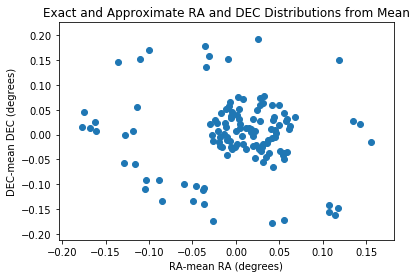

In [15]:
A = np.arccos(np.sin(y1Rad)*np.sin(y1Rad)+np.cos(y1Rad)*np.cos(y1Rad)*np.cos(x1Rad-np.array(raRad)))
B = np.arccos(np.sin(y1Rad)*np.sin(np.array(decRad))+np.cos(y1Rad)*np.cos(np.array(decRad))*np.cos(x1Rad-x1Rad))

for i in range(0,126):
    if x1Rad>raRad[i]:
        A[i]=-A[i]
    if y1Rad>decRad[i]:
        B[i]=-B[i]

Adeg = np.array(A)*(180./np.pi)
Bdeg = np.array(B)*(180./np.pi)

plt.scatter(Adeg, Bdeg, label='Exact')
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()

plt.title('Exact and Approximate RA and DEC Distributions from Mean')
plt.xlabel('RA-mean RA (degrees)')
plt.ylabel('DEC-mean DEC (degrees)')

# extracting manually written velocity ranges given spectrum name

In [16]:
#tried text file, didn't work
#%%writefile ranges.txt
['M83_Disk_552',-50,70]
['M83_Disk_075',260,430]
['M83_Disk_176',-200,0]

UsageError: Line magic function `%%writefile` not found.


In [230]:
file = open('./ranges.txt','r')

In [234]:
print(file.read())

In [237]:
import linecache
linecache.getline('ranges.txt', 1)


'[M83_Disk_552,-50,70]\n'

In [258]:
#EXAMPLE of how to use an array to look through lists
ranges = np.array([
    ["a", "1", "2"],
    ["a", "3", "4"],
    ["b", "1", "2"],
    ["c", "1", "2"],
])
#this is the matrix with all the information

tup = np.where(ranges == "a") #looks for where exactly in the matrix it can find the string
print(tup)

row_indices = tup[0] #only looks at strings that match and makes row_indices those numbers of the row
col_indices = tup[1] #irrelevant for our purposes because we don't need to index into columns
for i in range(len(row_indices)):
    print( ranges[ row_indices[i] ] ) #[ col_indices[i] ] )

(array([0, 1]), array([0, 0]))
['a' '1' '2']
['a' '3' '4']


In [287]:
ranges = np.array([
    [names[0],'-50','70'],
    [names[1],'260','430'],
    [names[2],'-200','0']
])
#created the matrix with the information

tup = np.where(ranges=='M83_Disk_075') #looks for where exactly in the matrix it can find the string
print(tup)

row_indices = tup[0] #only looks at strings that match and makes row_indices those numbers of the row
for i in range(len(row_indices)):
    print(ranges[row_indices[i],1])
    print(ranges[row_indices[i],2])
    #this goes into ranges and finds where row_indices is at the first and second index
    #it then returns the second entry in that row and then the third entry in that row (the 1 and 2)


(array([1]), array([0]))
260
430


In [285]:
#function that finds the range(s) given the name of the spectrum
def findRange(name):
    ranges = np.array([
        [names[0],'-50','70'],
        [names[1],'260','430'],
        [names[1],'0','40'],
        [names[2],'-200','0']
    ])
    
    tup = np.where(ranges==name) #looks for where exactly in the matrix it can find that string
    
    vel_range = [] #create an empty list for velocity ranges
    row_indices = tup[0] #only looks at strings that match and makes row_indices those numbers of the row
    for i in range(len(row_indices)):
        v0 = ranges[row_indices[i],1]
        v1 = ranges[row_indices[i],2]
        #this goes into ranges and finds where row_indices is at the first and second index
        #it then returns the second entry in that row and then the third entry in that row (the 1 and 2)
        vel_range.append(v0)
        vel_range.append(v1)
        #appends the velocities to the list and then returns the list
    return vel_range

In [314]:
print(findRange(names[1])) #can show all the velocity values
print(findRange(names[1])[3]) #can find 1 of the velocity values (makes it an integer)

['260', '430', '0', '40']
40


# making a 'mask.txt' file instead of array

In [460]:
from astropy.io import ascii
r = ascii.read('/Users/PallaviMaladkar/Documents/Research/spectrumranges.txt')

In [461]:
r

name,vmin1,vmax1,flag,vmin2,vmax2
str12,int64,int64,int64,int64,int64
M83_Disk_552,270,410,0,0,0
M83_Disk_075,260,430,0,0,40
M83_Disk_176,-200,0,0,0,0


In [462]:
vmin1 = r['vmin1'].data
vmax1 = r['vmax1'].data
flag = r['flag'].data
vmin2 = r['vmin2'].data
vmax2 = r['vmax2'].data
vmin=a['vmin'].data


In [463]:
vmin1[0]

270

# fitting a continuum to a specified region

(0, 1.5)

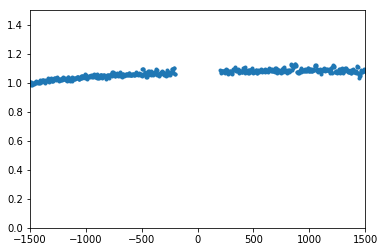

In [468]:
q=np.where((vel_MWK<-200.)|(vel_MWK>200.)) #how to cut out a region and graph the values
#plt.plot(vel_MWK[q],flux[q,10])

flx=flux[:,10]
plt.plot(vel_MWK[q],flx[q],'.')
plt.xlim([-1500,1500])
plt.ylim([0,1.5])


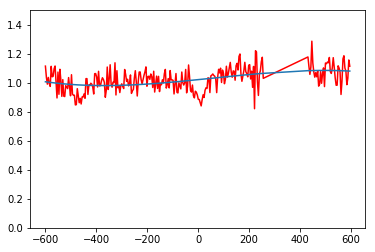

In [561]:
#VARIABLES - can be manipulated
index = 2
#setting the visible range of the data - needs to be incorporated into the fit range
viewmin = -600.
viewmax = 600.
#degree of polynomial fit
degree = 3

'''
#cutting only the range we need - between -450 and 450 and cutting out between vmin1 and vmax1
q = np.where( 
    np.logical_and(
        np.logical_and(
            vel_MWK > viewmin, 
            vel_MWK < viewmax
        ),
        np.logical_or(
            vel_MWK < vmin1[index-1],
            vel_MWK > vmax1[index-1]
        ) 
    ) == True 
)
'''

qq=np.where( (vel_MWK > viewmin) & (vel_MWK < viewmax)  &  ((vel_MWK < vmin1[index-1]) | (vel_MWK > vmax1[index-1])))
#np.where( (vel_MWK<vmin1[index-1]) | (vel_MWK>vmax1[index-1]) )

flx=flux[:,index] #all flux values at the index (specfic spectrum)
plt.plot(vel_MWK[qq],flx[qq],'r') #plotting the data in the region
plt.ylim([0,1.5]) #y-range

#func = scipy.interpolate.interp1d(vel_MWK[q],flx[q])
#plt.plot(vel_MWK[q], func(vel_MWK[q])) 

fit=np.poly1d(np.polyfit(vel_MWK[qq],flx[qq],degree)) #polynomial that fits the data to a degree of 3
#coef = np.poly1d(np.polynomial.legendre.Legendre.fit(vel_MWK[q],flx[q],3)) #legendre function for better fits
continuum = fit(vel_MWK) #inputs all x-values into the polynomial fit to produce some y-values
plt.plot(vel_MWK[qq],continuum[qq]) #plotting the polynomial at x-values over whole range



# function that fits continuum to spectrum

In [735]:
#function converting from wavelength to velocity
def rb_veldiff(waverest,wave):
    spl=2.9979e5; #speed of light
    vel = (waverest-wave*(1.0 + 0.))*spl/(wave*(1.0 + 0.))
    return vel

def continuumFit(index, velocity, viewmin=-450., viewmax=450., degree=3, err_degree=3, plot=False):
    
    #importing stuff
    import numpy as np
    import matplotlib.pyplot as plt
    from astropy.io import fits
    #provides access to fits (flexible image transport system) files
    from matplotlib.pyplot import cm 
    from astropy.wcs import WCS
    from astropy.table import Table
    #transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
    %matplotlib inline

    T=Table()
    tab=fits.open('SCIENCE_RBNSPECTRA.fits');
    info= tab[1].data
    #the info variable now contains the position and naming information
    #info.columns - assigning the information in the columns to variables
    ra=info['RA']
    dec=info['DEC']
    names=info['object']
    
    #FLUX values
    tab=fits.open('coadd_spectrum.fits')
    flux=tab[0].data #flux gets the flux values from the specific spectrum file
    #ERROR valies
    tab=fits.open('coadd_spectrum_err.fits')
    error=tab[0].data #error is a variable that will be getting the error values from respective file
    #WAVELENGTH values
    tab=fits.open('wave_grid.fits')
    wave=tab[0].data *10. #multiplying by 10 converts it to Angstroms
    #wave variable is now getting the wavelength values from its respective file

    #finding relative velocities
    # Create velocity grid for MW and M83
    ztarget = 0.001711;
    #redshift value of M83 (for the galaxy as a whole)
    wrest=(wave)/(1.+ztarget);
    CaII_wrestK= 3933.6614 # 3934.7771
    CaII_wrestH= 3968.4673 
    #H and K are prominent absorption lines for Ca II
    
    #function converting from wavelength to velocity
    def rb_veldiff(waverest,wave):
        spl=2.9979e5; #speed of light
        vel = (waverest-wave*(1.0 + 0.))*spl/(wave*(1.0 + 0.))
        return vel

    vel_M83K=rb_veldiff(CaII_wrestK,wrest);
    vel_MWK= rb_veldiff(CaII_wrestK,wave);

    vel_M83H=rb_veldiff(CaII_wrestH,wrest);
    vel_MWH= rb_veldiff(CaII_wrestH,wave);
    
    
    
    
    
    
    #reading into the table
    T1=Table.read('MWKvel.txt',format='ascii') #calls in the table
    #looking for the row in the table that matches the name corresponding to the index
    w=np.where(T1['names']==names[index])
    #assigning velocity ranges
    vmin1 = T1['vmin1'][w]
    vmax1 = T1['vmax1'][w]
    
    #cutting the range we want to see on the graph
    q=np.where( 
        (velocity>viewmin) & 
        (velocity<viewmax) #&  
        #((velocity<vmin1[index-1]) | (velocity>vmax1[index-1])) #done in mask
    )
    
    flx=flux[:,index] #all flux values at the index (specfic spectrum)
    err=error[:,index]
    
    flux_small=flx[q]
    vel_small=velocity[q]
    err_small=err[q]
    
    #cutting the cut out velocity range
    mask=np.where(
        ((vel_small<vmin1) | (vel_small>vmax1))
    )
    
    flux_mask=flux_small[mask]
    vel_mask=vel_small[mask]
    err_mask=err_small[mask]
    
    #calculating flux continuum
    #fit=np.poly1d(np.polyfit(velocity[q],flx[q],degree)) #polynomial that fits the data to a degree of 3
    fit=np.poly1d(np.polyfit(vel_mask,flux_mask,degree))
    #continuum = fit(velocity) #inputs all x-values into the polynomial fit to produce some y-values
    continuum = fit(vel_small)
    
    #calculating error continuum
    fit_err=np.poly1d(np.polyfit(vel_small,err_small,err_degree))
    err_continuum = fit_err(vel_small)
    
    #calculating normalized flux and error (by dividing by continuum)
    fnorm=flux_small/continuum
    enorm=err_small/err_continuum
    
    #plotting everything
    if (plot==True):
        plt.plot(vel_small,flux_small)
        ###plt.plot(velocity[q],flx[q],'r') #plotting the data in the region
        #plt.plot(vel_mask,flux_mask,'r')
        ###plt.plot(velocity[q],continuum[q]) #plotting the polynomial at x-values over whole range
        #plt.plot(vel_small,continuum)
        #plt.plot(vel_small,err_small)
        #plt.plot(vel_small,err_continuum)
        plt.plot(vel_small,fnorm)
        #plt.plot(vel_small,enorm)
        plt.ylim([0,2]) #y-range
        plt.xlim([viewmin,viewmax])
    
    return continuum

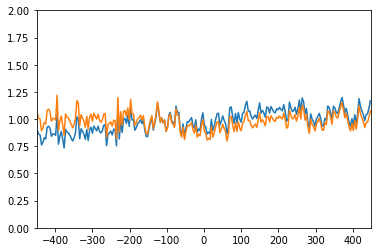

In [744]:
cont=continuumFit(4,vel_MWK,degree=5,plot=True)
#print(cont)

In [794]:
test={}
test['cont']=cont
test['name']=names[0]

test['cont']

array([1.08674693, 1.08243846, 1.07839037, 1.0745947 , 1.07104361,
       1.06772937, 1.0646444 , 1.06178121, 1.05913248, 1.05669096,
       1.05444956, 1.05240128, 1.05053926, 1.04885674, 1.04734711,
       1.04600382, 1.0448205 , 1.04379084, 1.04290868, 1.04216794,
       1.04156269, 1.04108708, 1.04073539, 1.04050199, 1.04038137,
       1.04036813, 1.04045698, 1.0406427 , 1.04092023, 1.04128458,
       1.04173087, 1.04225431, 1.04285023, 1.04351406, 1.04424132,
       1.04502763, 1.04586871, 1.04676037, 1.04769854, 1.04867921,
       1.0496985 , 1.05075259, 1.05183777, 1.05295043, 1.05408704,
       1.05524415, 1.05641843, 1.0576066 , 1.0588055 , 1.06001204,
       1.06122322, 1.06243612, 1.06364791, 1.06485584, 1.06605725,
       1.06724955, 1.06843023, 1.06959688, 1.07074715, 1.07187877,
       1.07298955, 1.07407737, 1.0751402 , 1.07617608, 1.07718311,
       1.07815949, 1.07910345, 1.08001334, 1.08088755, 1.08172453,
       1.08252284, 1.08328107, 1.0839979 , 1.08467205, 1.08530

In [664]:
import pickle
pickle.dump( test, open( "save.p", "wb" ) )



In [667]:
test1=pickle.load(open( "save.p", "rb" ) )

test1

{'cont': array([-256.87384243, -256.40716713, -255.94106583, ...,  532.78628665,
         533.46987057,  534.15402227]), 'name': 'M83_Disk_552'}

# TABLE (velocity ranges)

In [817]:
from astropy.table import Table

tableMWK=Table.read('MWKvel.txt',format='ascii')
tableMWH=Table.read('MWHvel.txt',format='ascii')
tableM83K=Table.read('M83Kvel.txt',format='ascii')
tableM83H=Table.read('M83Hvel.txt',format='ascii')

'''
T=Table()
T['names']=names
T['vmin1']=-100.0 +np.zeros(len(names))
T['vmax1']=100.0 +np.zeros(len(names))
T['flag']=0*np.zeros(len(names))
T['vmin2']=0*np.zeros(len(names))
T['vmax2']=0*np.zeros(len(names))
T['vmin3']=0*np.zeros(len(names))
T['vmax3']=0*np.zeros(len(names))
T['vmin4']=0*np.zeros(len(names))
T['vmax4']=0*np.zeros(len(names))
T['vmin5']=0*np.zeros(len(names))
T['vmax5']=0*np.zeros(len(names))
'''


"\nT=Table()\nT['names']=names\nT['vmin1']=-100.0 +np.zeros(len(names))\nT['vmax1']=100.0 +np.zeros(len(names))\nT['flag']=0*np.zeros(len(names))\nT['vmin2']=0*np.zeros(len(names))\nT['vmax2']=0*np.zeros(len(names))\nT['vmin3']=0*np.zeros(len(names))\nT['vmax3']=0*np.zeros(len(names))\nT['vmin4']=0*np.zeros(len(names))\nT['vmax4']=0*np.zeros(len(names))\nT['vmin5']=0*np.zeros(len(names))\nT['vmax5']=0*np.zeros(len(names))\n"

In [820]:
#tableM83H['degree']=5.+np.zeros(len(names))
#tableM83H

names,vmin1,vmax1,flag,vmin2,vmax2,vmin3,vmax3,vmin4,vmax4,vmin5,vmax5,degree
str14,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
M83_Disk_552,-200.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_075,-450.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_176,-200.0,100.0,0.0,500.0,580.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_096,-200.0,50.0,0.0,500.0,550.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_512,-200.0,200.0,0.0,400.0,580.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_186,-200.0,100.0,0.0,470.0,550.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Galaxy_008,-200.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_142,-200.0,150.0,0.0,440.0,550.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Sky_621,-200.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [821]:
#tableM83H.write('M83Hvel.txt',format='ascii',overwrite=True)
#tableM83H

names,vmin1,vmax1,flag,vmin2,vmax2,vmin3,vmax3,vmin4,vmax4,vmin5,vmax5,degree
str14,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
M83_Disk_552,-200.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_075,-450.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_176,-200.0,100.0,0.0,500.0,580.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_096,-200.0,50.0,0.0,500.0,550.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_512,-200.0,200.0,0.0,400.0,580.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_186,-200.0,100.0,0.0,470.0,550.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Galaxy_008,-200.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Disk_142,-200.0,150.0,0.0,440.0,550.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
M83_Sky_621,-200.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [781]:
#modifying velocity ranges for tableMWK
'''
for i in range(5,126):
    q=np.where(T1['names']==names[i])
    T1['vmin1'][q]=-200;
    T1['vmax1'][q]=200;
    T1.write('MWKvel.txt',format='ascii',overwrite=True)
T1
'''

"\nfor i in range(5,126):\n    q=np.where(T1['names']==names[i])\n    T1['vmin1'][q]=-200;\n    T1['vmax1'][q]=200;\n    T1.write('MWKvel.txt',format='ascii',overwrite=True)\nT1\n"

In [611]:
'''
#to edit or add columns to table
T['names']=names
T['vmin1']=-100.0 +np.zeros(len(names))
T['vmax1']=100.0 +np.zeros(len(names))
T['flag']=0*np.zeros(len(names))
'''

In [785]:
q=np.where(tableMWK['names']==names[0])
tableMWK['vmin1'][q]
#tableMWK['vmin1'][q]=280; have to overwrite after this

-50.0


# the code you need to modify a cell in the table

In [798]:
index=5
velocity=vel_MWK

if str(velocity)==str(vel_MWK):
    table=tableMWK
elif str(velocity)==str(vel_MWH):
    table=tableMWH
elif str(velocity)==str(vel_M83K):
    table=tableM83K
elif str(velocity)==str(vel_M83H):
    table=tableM83H

q=np.where(table['names']==names[index])
'''
table['vmin1'][q]=-580
table['vmax1'][q]=-420
table['vmin2'][q]=-150
table['vmax2'][q]=100

table.write('MWKvel.txt',format='ascii',overwrite=True)
'''

In [2]:
import modules as m
from importlib import reload
reload(m)
m.continuumFit2(10,vel_MWK)

NameError: name 'vel_MWK' is not defined

204.21324999999652 , -29.83552777777728


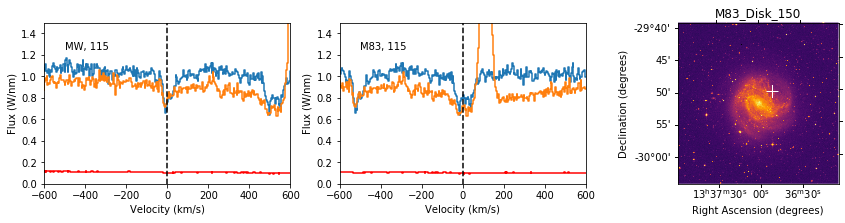

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [58]:
from importlib import reload
reload(m)
m.extractSpectrum(115)